Ce script sert à la normalisation des variables brutes des fichiers variant caller.

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import scipy as sp
import sklearn.cluster
import tqdm
from scipy.stats import zscore, kstest, kruskal

In [2]:
path = r"C:\Users\ahmed\MFE project"    
df = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("Database_tsv")>-1][0]))

In [3]:
df = df.replace("NAV", "NVA")
df = df.replace("nva", "NVA")

In [4]:
df.columns

Index(['Unnamed: 0', 'Barcode', 'Sample Name', 'Chrom', 'Position', 'Ref',
       'Variant', 'Gene ID', 'Region Name', 'Type', 'Allele Call', 'Genotype',
       'Frequency', 'Quality', 'Coverage', 'Allele Cov', 'Allele Name',
       'AA_mut_syntax', 'CDS_mut_syntax', 'Allele Source', 'annee', 'type',
       'date', 'num', 'classe', 'ordre', 'longueur'],
      dtype='object')

In [5]:
var = ['Ref', 'Variant', 'Genotype', "Frequency", "Quality", "Coverage", "Allele Cov", "annee", "type", "date", "num", "classe", "ordre", "longueur"]
df_var = df[var]

In [ ]:
sns.pairplot(data=df_var[["Frequency", "Quality", "Coverage", "Allele Cov", "classe", "longueur"]], hue = "classe")

In [ ]:
corrMatrix = df_var[["Frequency", "Quality", "Coverage", "Allele Cov", "longueur"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Nous pouvons voir que la variable "Quality" est très corrélée avec "Allele Cov" et corrélée avec Frequency".

<AxesSubplot:xlabel='classe', ylabel='longueur'>

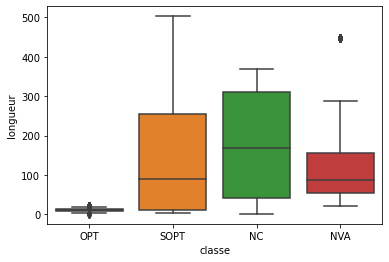

In [14]:
sns.boxplot(data=df_var, x="classe", y="longueur")

In [8]:
np.array([df_var[df_var["ordre"]==i]["Coverage"].values for i in range(df_var["ordre"].values[-1])]).shape()

C:\Users\ahmed\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


TypeError: 'tuple' object is not callable

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_norm = scaler.fit_transform(df_var[["Frequency", "Quality", "Coverage", "Allele Cov", "longueur"]])
df_norm = pd.concat([df_var, pd.DataFrame(df_norm, columns = ["Frequency_norm", "Quality_norm", "Coverage_norm", "Allele Cov_norm", "longueur_norm"])], axis = 1)


In [29]:
from joblib import dump, load

# to save the kmeans model

dump(scaler, 'normalizeMinMax_tsv_saved.joblib')

['normalizeMinMax_tsv_saved.joblib']

In [26]:
df_norm

,Ref,Variant,Genotype,Frequency,Quality,Coverage,Allele Cov,annee,type,date,num,classe,ordre,longueur,Frequency_norm,Quality_norm,Coverage_norm,Allele Cov_norm,longueur_norm
0,T,C,T/C,49.4,4330.970,795.0,393.0,2018,NDN,4-12-18,1,OPT,0,5,0.494,0.127363,0.392947,0.1965,0.007968
1,A,G,A/G,18.8,1213.510,1394.0,262.0,2018,NDN,4-12-18,1,OPT,0,5,0.188,0.035616,0.694710,0.1310,0.007968
2,G,A,A/A,99.9,33012.700,1958.0,1956.0,2018,NDN,4-12-18,1,OPT,0,5,0.999,0.971465,0.978841,0.9780,0.007968
3,C,T,C/T,3.6,147.052,1186.0,43.0,2018,NDN,4-12-18,1,OPT,0,5,0.036,0.004230,0.589924,0.0215,0.007968
4,G,C,G/C,48.8,4628.400,873.0,426.0,2018,NDN,4-12-18,1,OPT,0,5,0.488,0.136116,0.432242,0.2130,0.007968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,C,T,C/T,89.2,9310.870,776.0,692.0,2021,OBL,23-03-21,2,SOPT,607,7,0.892,0.273921,0.383375,0.3460,0.011952
15375,C,T,T/T,99.3,9653.720,582.0,578.0,2021,OBL,23-03-21,2,SOPT,607,7,0.993,0.284011,0.285642,0.2890,0.011952
15376,G,C,G/C,97.5,31215.100,1937.0,1888.0,2021,OBL,23-03-21,2,SOPT,607,7,0.975,0.918561,0.968262,0.9440,0.011952
15377,CCCCAGCCCTCCAGGT,-,-/-,100.0,19775.800,1177.0,1177.0,2021,OBL,23-03-21,2,SOPT,607,7,1.000,0.581903,0.585390,0.5885,0.011952


In [28]:
# df_norm.to_csv("DataBase_Norm_tsv.csv")